# Getting_Started
1. run `pip install jupytexmagic`
2. create a new cell with `import jupytexmagic` and `%load_ext jupytexmagic`
3. have fun! for tex cells, place `%%tex` at the top of your cell

If your tex compilation fails, you can use the `%%texdebug` magic command
to display the output of `pdflatex` when compiling for debugging purposes.

## Example Runs

In [1]:
pip install jupytexmagic

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jupytexmagic
%load_ext jupytexmagic

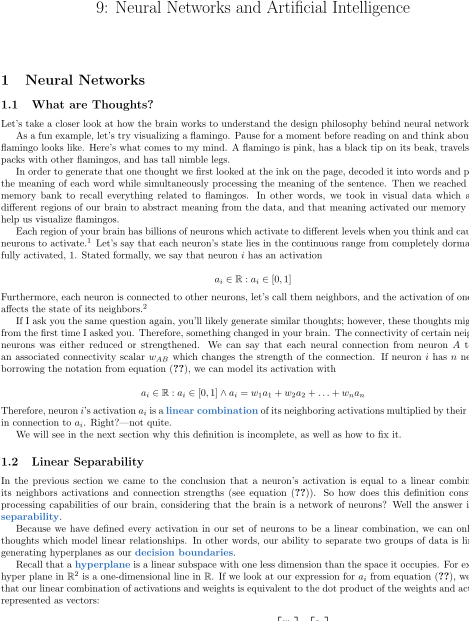

In [3]:
%%tex
\title{9: Neural Networks and Artificial Intelligence}
\date{}
\author{}
% Packages
\usepackage{amsmath}
\usepackage{amsfonts}
\usepackage{mathtools}
\usepackage{graphicx}
\usepackage{siunitx}[=v2]
\usepackage{physics}
\usepackage[dvipsnames]{xcolor}
\usepackage{caption}
\usepackage{float}
\usepackage{pgfplots}
\usepackage{geometry}
\geometry{
  paperwidth=7in,
  paperheight=100in,
  margin=1in
}
\pgfplotsset{compat=1.18}
\usepackage[inkscapelatex=false]{svg}

% Commands
\DeclarePairedDelimiter{\ceil}{\lceil}{\rceil}
\DeclarePairedDelimiter{\floor}{\lfloor}{\rfloor}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
\newcommand{\df}[3]{\textcolor{NavyBlue}{\textbf{#1}}}

% Figure formatting
\DeclareCaptionFormat{custom}
{%
    \textbf{#1#2}\textit{\small #3}
}
\captionsetup{format=custom}

% use commmas instead of periods in SI units
\sisetup{output-decimal-marker = {,}}
% \input{glossary}
\begin{document}
\maketitle
% \input{tablecontents}

\section{Neural Networks}
\subsection{What are Thoughts?}
 Let's take a closer look at how the brain works to understand the design philosophy behind neural networks.

As a fun example, let's try visualizing a flamingo. Pause for a moment before reading on and think about what a flamingo looks like. Here's what comes to my mind. A flamingo is pink, has a black tip on its beak, travels in large packs with other flamingos, and has tall nimble legs. 

In order to generate that one thought we first looked at the ink on the page, decoded it into words and processed the meaning of each word while simultaneously processing the meaning of the sentence. Then we reached into our memory bank to recall everything related to flamingos. In other words, we took in visual data which activated different regions of our brain to abstract meaning from the data, and that meaning activated our memory recall to help us visualize flamingos. 

Each region of your brain has billions of neurons which activate to different levels when you think and cause other neurons to activate.\footnote{The human brain has 86 billion total neurons. Some are very short (less than a milimeter in length) while others are over a meter!} Let's say that each neuron's state lies in the continuous range from completely dormant, 0, to fully activated, 1. Stated formally, we say that neuron $i$ has an activation

\begin{equation}\label{eq:a_i}
    a_i\in\mathbb{R}:a_i\in[0,1]
\end{equation}
Furthermore, each neuron is connected to other neurons, let's call them neighbors, and the activation of one neuron affects the state of its neighbors.\footnote{cf. Markov Chains}

If I ask you the same question again, you'll likely generate similar thoughts; however, these thoughts might differ from the first time I asked you. Therefore, something changed in your brain. The connectivity of certain neighboring neurons was either reduced or strengthened. We can say that each neural connection from neuron $A$ to $B$ has an associated connectivity scalar $w_{AB}$ which changes the strength of the connection. If neuron $i$ has $n$ neighbors, borrowing the notation from equation \eqref{eq:a_i}, we can model its activation with

\begin{equation}\label{eq:weight activation}
    a_i\in\mathbb{R}:a_i\in[0,1]\land a_i=w_1a_1+w_2a_2+\ldots+w_na_n
\end{equation}
Therefore, neuron $i$'s activation $a_i$ is a \df{linear combination}{}{DC} of its neighboring activations multiplied by their strength in connection to $a_i$. Right?—not quite.

We will see in the next section why this definition is incomplete, as well as how to fix it.

\subsection{Linear Separability}

In the previous section we came to the conclusion that a neuron's activation is equal to a linear combination of its neighbors activations and connection strengths (see equation \eqref{eq:weight activation}). So how does this definition constrict the processing capabilities of our brain, considering that the brain is a network of neurons? Well the answer is \df{linear separability}{}{Two sets of data are linearly separable if there exists a linear decision boundary which properly separates these two sets of data. This linear boundary is a hyperplane. Two sets of data are linearly separable if and only if their convex hulls do not overlap.}.

Because we have defined every activation in our set of neurons to be a linear combination, we can only create thoughts which model linear relationships. In other words, our ability to separate two groups of data is limited to generating hyperplanes as our \df{decision boundaries}{decision boundary}{A hypersurface that separates $n$-dimensional data into two classes such that all the points on one side belong to the first class, and all the points on the other side belong to the second class.}. 

Recall that a \df{hyperplane}{}{A linear subspace with one less dimension than the space it occupies. All hyperplanes can be represented a linear combination.} is a linear subspace with one less dimension than the space it occupies. For example a hyper plane in $\mathbb{R}^2$ is a one-dimensional line in $\mathbb{R}$. If we look at our expression for $a_i$ from equation \eqref{eq:weight activation}, we can see that our linear combination of activations and weights is equivalent to the dot product of the weights and activations represented as vectors:

\begin{equation}\label{eq:linear combo hyperplane}
    a_i  =  w_1a_1+w_2a_2+\ldots+w_na_n 
     = 
    \begin{bmatrix}
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        a_1 \\
        a_2 \\
        \vdots \\
        a_2
    \end{bmatrix}=
    \mathbf{w_N}\cdot\mathbf{a_N}
\end{equation}

If we take the \df{gradient}{}{DC} of our activation vector with respect to our weights $\mathbf{w}$—with respect to weights rather than activations because the weights or neural connection strengths are what we update, not activations—we get the dot product between a vector of $1$s and our activations, causing our expression to evaluate to the sum of neihgboring activations, which is just a constant:

\begin{equation}\label{eq:c=}
\begin{aligned}
    \nabla_\mathbf{w} a_i&=
    \nabla_\mathbf{w}(\mathbf{w_N}
    \cdot
    \mathbf{a_N})
    =(\nabla_\mathbf{w}\mathbf{w_N})\cdot\mathbf{a_N}+\mathbf{w_N}\cdot(\nabla_\mathbf{w}\mathbf{a_N})\\
    &=
    \begin{bmatrix}
        \pdv{w_1}{w_1}\\[0.5em]
        \pdv{w_2}{w_2}\\[0.5em]
        \vdots\\[0.5em]
        \pdv{w_n}{w_n}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        a_1\\[0.5em]
        a_2\\[0.5em]
        \vdots\\[0.5em]
        a_n
    \end{bmatrix}
    +
    \begin{bmatrix}
        w_1 \\[0.5em]
        w_2\\[0.5em]
        \vdots\\[0.5em]
        w_n
    \end{bmatrix}
    \cdot
    \mathbf{0}
    =
    \begin{bmatrix}
        1 \\
        1 \\
        \vdots \\
        1
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        a_1 \\
        a_2 \\
        \vdots \\
        a_n
    \end{bmatrix}
     \\
    &=a_1+a_2+\ldots+a_n=c:c\in\mathbb{R}
\end{aligned}
\end{equation}

Therefore, our variable $a_i$ is bound to evaluate to a constant, thereby having one less degree of freedom than the dimension it occupies. Furthermore, because we know that the gradient evaluates to a constant, $a_i$ is linear (i.e. its rate of change is constant). So we can say that $a_i$ is a hyperplane.

Figure \ref{fig:linear sep} shows the difference between linearly separable and non-linearly separable data. We can see that the decision boundary on the right in figure \ref{fig:linear sep} is clearly non-linear, and therefore not a hyperplane. So we cannot model non-linear systems with our current model of what a neuron is since our model only allows us to create hyperplanes.

\begin{figure}[H]
\centering
\centerline{\includesvg[width=0.75\columnwidth]{images/9-linear_separability.svg}}
\caption{\label{fig:linear sep} Two datasets in $\mathbb{R}^2$ and their decision boundaries colored cyan blue. The dataset on the left is linearly separable by a hyperplane decision boundary. The dataset on the right is not linearly separable because it has a non-linear decision boundary.}
\end{figure}

\begin{figure}[H]
\centering
\centerline{\includesvg[width=0.75\columnwidth]{images/9-convex_hull.svg}}
\caption{\label{fig:convex hull} The resulting convex hull from a set of data points. Edges are drawn such that every angle is less than 180 degrees, so area is maximized (i.e. there are no concave features).}
\end{figure}

But how do we determine linear separability without drawing decision boundaries? Well, the answer is by drawing convex hulls. A \df{convex hull}{}{The smallest convex shape that can enclose a set of data points.} is simply the smallest convex shape that can enclose all of our data points. Figure \ref{fig:convex hull} shows how to draw a convex hull from a set of data points in $\mathbb{R}^2$. 

A dataset is linearly separable if there are two classes (we cannot separate a space into more than two subspaces using a single hyperplane) and the convex hulls of those two classes of points do not overlap. Figure \ref{fig:convex overlap} shows how the convex hulls of non-linear data overlap with each other.

\begin{figure}[H]
\centering
\centerline{\includesvg[width=0.5\columnwidth]{images/9-convex_overlap.svg}}
\caption{\label{fig:convex overlap} Convex hulls of the two data classes from the right graph in figure \ref{fig:linear sep}. The data is not linearly separable because the convex hulls of the two classes overlap.}
\end{figure}

We now know that this model of the neuron is missing a component. Why? Because if you look at the non-linear data, your brain can visually generate the curved decision boundary separating the two classes—something that our model cannot do. Therefore, we need a non-linear component in our model of the neuron. 

Rather than our activation $a_i$ being determined by a linear combination of its $n$ neighboring activations and weights, $a_i$ is the output of a \df{non-linear activation function}{}{Notated as $g$, the non-linear activation function is the second part of the perceptron. It takes a preactivation $z$ as input, and outputs an activation $a$. $g$ is non-linear because its derivative $g'$ is either not constant or $g'$ has multiple values.} $g$ which takes in this linear combination as $z_i$ and outputs a real number (see equation \eqref{eq:preactivation and g}).

\begin{equation}\label{eq:preactivation and g}
\begin{aligned}
    z_i &=a_1w_1+a_2w_2+\ldots+a_nw_n=
    \begin{bmatrix}
        a_1 \\
        a_2 \\
        \vdots \\
        a_n
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
    \end{bmatrix}=\mathbf{a_N\cdot w_N}\\
    a_i &=g(z_i)=g(\mathbf{a_N\cdot w_N}) \textit{ where $N=neighbors$.}
\end{aligned}
\end{equation}

Let's recall the \df{Taylor series}{}{DC}, which allows us to model any infinitely differentiable function $f(x)$ stationed at $a$ using the \df{power series}{}{DC} formula

\begin{equation}\label{Taylor Series}
    T(x)=f(a)+\frac{f^{(1)}(a)}{1!}(x-a)+\frac{f^{(2)}(a)}{2!}(x-a)^2+\ldots+\frac{f^{(n)}(a)}{n!}(x-a)^n
\end{equation}
where $f^{(n)}(a)$ is the $n$th derivative of $f$ at $a$. Figure \ref{fig:taylor series graph} shows an example of Taylor expansion of $f(x)=\sin x$ at $a=0$. 

\begin{figure}[H]
\centering
\begin{tikzpicture}
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=middle,
    ymin=-6,
    ymax=6,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(0.3,0.98)}} 
]
    \addplot+[mark=none,Cerulean,ultra thick] {sin(deg(x))};
    \addplot+[mark=none,YellowOrange,very thick] {x};
    \addplot+[mark=none,brown,very thick] {x-(x^3)/6};
    \addplot+[mark=none,SkyBlue,very thick] {x-(x^3)/6+(x^5)/120};
    %\addplot+[mark=none,magenta,very thick] {x-(x^3)/6+(x^5)/120-(x^7)/5040};
    \legend{$\sin(x)$,$T_1(x)$,$T_3(x)$,$T_5(x)$}
\end{axis}
\end{tikzpicture}
\caption{\label{fig:taylor series graph} Taylor expansion of \textcolor{Cerulean}{$\sin x$ in cyan} by polynomials of degree \textcolor{YellowOrange}{1 in orange}, \textcolor{brown}{3 in brown}, and \textcolor{SkyBlue}{5 in teal}. Notice how as we stray further from $x=a=0$, the approximation becomes less accurate.}
\end{figure} 
As $n$ approaches infinity, the inaccuracies in our Taylor approximation $T(x)$ iron out and the series approaches $f(x)$ across the whole range of our domain $x\in(-\infty,\infty)$.

Your brain's network of neurons works in a similar way. Each neuron has a non-linear component $g$, and as an activation stimulus \df{propagates}{propagate}{a fancy word for spreads. (e.g. activations propagate throughout a neural network)} (a fancy word for spreads) throughout the network it gets mushed and stretched by each neuron's non-linear component to approximate some mapping of stimuli inputs to desired outputs. 

The resulting data at the end is one that is linearly separable because we have created a non-linear decision boundary. For example in binary classification if we have generated the non-linear decision boundary $d(x)$, our last layer of the network outputs a \df{linear classifier}{}{DC} $l(x)$ which determines whether a point is below our decision boundary or above (see equation \eqref{eq:linear classifier}{}). %DC

\begin{equation}\label{eq:linear classifier}
l(x)=
\begin{cases}
    1 & \text{if $x\ge d(x)$} \\
    0 & \text{if $x<d(x)$}
\end{cases}
\end{equation}
\subsection{Perceptrons: A Digital Analog to the Neuron}
The \df{perceptron}{}{the fundamental building block of a neural network. Made to be a digital analog to the neuron, a perceptron in row $r$ and layer $l$ of our network takes in the activation vector from the previous layer $\mathbf{A^{l-1}}\in\mathbb{R}^m$ and outputs an activation as follows: $a_r^l=g(\mathbf{w_r^l}\cdot\mathbf{A^l-1}+b_r^l)$ where $g$ is our non-linear activation function, $\mathbf{w_r^l}\in\mathbb{R}^m$ is the perceptron's associated weight vector, and $b\in\mathbb{R}$ is the bias associated with that network.} is the fundamental building block of a neural network and it is similar to the brain's neuron.

The perceptron consists of two parts, one linear and one non-linear. We call the first part linear because we perform a linear function. A perceptron in layer $l$ and row $r$ has an associated \df{weight vector}{}{DC} $\mathbf{w_r^l}$. We take the \df{dot product}{}{DC} of our input \df{activation vector}{}{DC} from the previous layer $\mathbf{A^{l-1}}$, where each element maps to a perceptron in the previous layer, and the perceptron's weight vector $\mathbf{w_r^l}$:

\begin{equation}\label{eq:linear half}
    \mathbf{A^{l-1}}\cdot \mathbf{w_r^l}=
    \begin{bmatrix}
        a_1^{l-1} \\[0.5em]
        a_2^{l-1} \\[0.5em]
        \vdots \\[0.5em]
        a_m^{l-1}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        w_{r1}^{l} \\[0.5em]
        w_{r2}^{l} \\[0.5em]
        \vdots \\[0.5em]
        w_{rm}^{l}
    \end{bmatrix}
    = a_1^{l-1}w_{r1}^l+a_2^{l-1}w_{r2}^l+\ldots+a_m^{l-1}w_{rm}^l
    = z_r^l
\end{equation}

The second part is non-linear because we perform a non-linear \df{activation function}{}{DC}, denoted $g(z)$. As we discussed in section 1.1, many relationships or mappings cannot be represented by a linear model alone. Therefore, we need to have the non-linear component in our perceptron to capture these non-linear relationships.

The function $g$ takes $z_r^l$ from equation (\ref{eq:linear half}) as input and applies a non-linear transformation:

\begin{equation}
    g(z_r^l)=a_r^l
\end{equation}

Figure \ref{fig:perceptron} shows this process of the perceptron transforming our input $A^{l-1}$ into $z_r^l$ in the linear part, then applying a on-linear transformation to this to obtain the activation vector for the next layer $a_r^l$.
% talk about sigmoid?

\begin{figure}[H]
\centering
\centerline{\includesvg[width=0.9\columnwidth]{images/9-perceptron.svg}}
\caption{\label{fig:perceptron}The perceptron, halved into two parts, the linear part and the non-linear part. The linear function (left half) outputs $z_r^l$, the dot product of activation vector $A^{l-1}$ and weight vector $w_r^l$. The non-linear function (right half) applies an activation to $z_r^l$ such as the sigmoid function $a_l^r=\sigma(z)=\frac{1}{1+e^{-z}}$ to output the activation vector $a_r^l$.}
\end{figure}

\subsection{Neural Network: A collection of Perceptrons}

To create a neural network, we assemble a network of perceptrons organized into $L$ layers where each of the $n$ perceptrons in the current layer receives an activation vector $A^{l-1}$ of $m$ activations—one activation from each of the $m$ perceptrons in the previous layer as shown in Figure \ref{fig:NN}.

\begin{figure}[H]
\centering
\centerline{\includesvg[width=0.75\columnwidth]{images/9.svg}}
\caption{\label{fig:NN}A fully connected neural network, which maps $x\in X$ (given as input to the \textcolor{NavyBlue}{dark blue perceptrons}) to $\hat{y}\in Y$ (the output obtained from the \textcolor{YellowOrange}{orange perceptrons}). These are the input and output layers respectively. Every layer in between them is called a 'hidden layer'.}
\end{figure}

For layer $l$ we assemble every perceptron's weight vector into the layer's \df{weight matrix}{}{notated as $\mathbf{W^l}$, this matrix stores the weights which we multiply by our vector from the previous layer $\mathbf{A^{l-1}}$ to obtain our preactivation vector $\mathbf{Z^l}$. We modify our weights throughout training to minimize our loss function and obtain the most accurate mapping from domain $X$ to codomain $Y$.} $W^l$ such that every column of $W^l$ is a perceptron weight vector as shown in equation \eqref{eq:W^l}.

\begin{equation}\label{eq:W^l}
    W^l=
    \begin{bmatrix}
        \mathbf{w_1^l} & \mathbf{w_2^l} & \dots & \mathbf{w_n^l}
    \end{bmatrix}
    =
    \begin{bmatrix}
        w_{11}^l & w_{21}^l & \dots & w_{n1}^l \\
        w_{12}^l & w_{22}^l & \dots & w_{n2}^l \\
        \vdots & \vdots & \dots & \vdots \\
        w_{1m}^l & w_{2m}^l & \dots & w_{nm}^l
    \end{bmatrix}
\end{equation}

Recall the shape of activation vector $A^{l-1}$ as shown in equation \eqref{eq:bungus}.

\begin{equation}\label{eq:bungus}
    \mathbf{A^{l-1}}=
    \begin{bmatrix}
        a_1^{l-1} \\[0.5em]
        a_2^{l-1} \\[0.5em]
        \vdots \\[0.5em]
        a_m^{l-1}
    \end{bmatrix}
\end{equation}

To obtain our pre-activation vector $\mathbf{Z^l}$ as a matrix multiplication of our weights and activations we must \df{transpose}{}{DC} our weight matrix, seen in equation \eqref{eq:Z^l}.

\begin{equation}\label{eq:Z^l}
\begin{aligned}
    \mathbf{Z^l}= &
    (W^l)^T\mathbf{A^{l-1}}=
    \begin{bmatrix}
        w_{11}^l & w_{12}^l & \dots & w_{1m}^l \\[0.5em]
        w_{21}^l & w_{22}^l & \dots & w_{2m}^l \\[0.5em]
        \vdots & \vdots & \vdots & \vdots \\[0.5em]
        w_{n1}^l & w_{n2}^l & \dots & w_{nm}^l
    \end{bmatrix}
    \begin{bmatrix}
        a_1^{l-1} \\[0.5em]
        a_2^{l-1} \\[0.5em]
        \vdots \\[0.5em]
        a_m^{l-1}
    \end{bmatrix}
    \\
    = &
    \begin{bmatrix}
        w_{11}^la_1^{l-1}+w_{12}^la_2^{l-1}+\dots+w_{1m}^la_m^{l-1} \\[0.5em]
        w_{21}^la_1^{l-1}+w_{22}^la_2^{l-1}+\dots+w_{2m}^la_m^{l-1} \\[0.5em]
        \vdots \\[0.5em]
        w_{n1}^la_1^{l-1}+w_{n2}^la_2^{l-1}+\dots+w_{nm}^la_m^{l-1}
    \end{bmatrix}
    =
    \begin{bmatrix}
        z_1^{l} \\[0.5em]
        z_2^{l} \\[0.5em]
        \vdots \\[0.5em]
        z_n^{l}
    \end{bmatrix}
\end{aligned}
\end{equation}

Equation \eqref{eq:transpose algebra} shows a dimensional analysis of the matrix multiplication to clearly show why we must take the transpose of $W^l$.

\begin{equation}\label{eq:transpose algebra}
\begin{aligned}
    \mathbf{Z^l}&=(W^l)^T\mathbf{A^{l-1}}=(m\times n)^T\times(m\times1)=(n\times m)\times(m\times1) \\
    &=(n\times m)
\end{aligned}
\end{equation}

We then apply our non-linear activation function $g$ to each element in our preactivation vector $Z^l$ to obtain our activation vector $A^l$ as shown in equation \eqref{eq:A^l}, which we use for the next layer in our network.

\begin{equation}\label{eq:A^l}
    \mathbf{A^l}=g(\mathbf{Z^l})=
    \begin{bmatrix}
        g(z_1^{l}) \\[0.5em]
        g(z_2^{l}) \\[0.5em]
        \vdots \\[0.5em]
        g(z_n^{l})
    \end{bmatrix}
\end{equation}

\subsection{Formal Definition of a Neural Network}
Neural networks can initially appear to be magical black boxes that somehow do everything. They can draw like Picasso, play chess better than Magnus Carlsen, and code programs from simple word prompts. However, upon closer examination we realize that a neural network is simply a function $\hat{y}=\mathcal{F}(x)$ that maps our domain to the codomain, $\mathcal{F}:X\rightarrow Y$. The network learns this mapping by training on a dataset which maps a subset of our domain to the codomain.

Formally, given a dataset of pairs $\{x^{(i)},y^{(i)}\}$, which is a \df{partial mapping}{}{we use the symbol $\rightharpoonup$ to denote a partial mapping, which maps a subset of our domain to $X$ to the codomain $Y$.} $D:X\rightharpoonup Y$, we define a \df{loss function}{}{$\mathcal{L}(\hat{y},y)$ measures the discrepancy between our neural network's mapped output $\hat{y}$, and the true output $y$ from our dataset.} $\mathcal{L}(\hat{y},y)$ representing the discrepancy between our network's mapping $\hat{y}$ and the mapping $y$ from our dataset, and in each training iteration we update the network's set of \df{weights}{}{DC} $W$ to minimize this loss: 
\begin{equation}
    W_{new}=\argmin_W\mathcal{L}(\hat{y},y)=W_{old}-\alpha\nabla_W\mathcal{L}(\hat{y},y)
\end{equation}
Eventually the marginal decrease in our loss function $\mathcal{L}$ approaches zero, at which point the network has \df{converged}{converge}{we say a function converges once it reaches an equilibrium at which point it stops changing. In machine learning, this means the marginal decrease in our loss function $\mathcal{L}(\hat{y},y)$ falls below some $1>\epsilon>0$.} and we have maximized the correspondence between the network's mapping and the dataset's partial mapping.

\subsection{Non-linear Activation Functions}

Let's examine perceptron in layer $l$ and row $r$ of our network. We know that the perceptron needs a non-linear activation function $g$ to modify the linear combination $z_r^l=\mathbf{A^{l-1}\cdot w_r^l}$ (preactivation) in order order to form non-linear decision boundaries, but how do we choose a good $g$? Let's recall our definition of a neuron's activation
$$
a_i\in\mathbb{R}:a_i\in[0,1]
$$
which states that the activation lies somewhere in the range from 0 to 1. Therefore, we want our function $g$ to bind our preactivation $z$ to this range. Figure \ref{fig:sigmoid} shows the \df{sigmoid}{}{also referred to as the logistic function, the sigmoid is a monotonic increasing activation function which maps the domain to the range $(0,1)$. It is defined by $\sigma(z)=1/(1+e^{-z})$. Its derivative is more expensive to calculate because it has an exponent and it is more susceptible to the vanishing gradient problem.} activation function $\sigma(z)$ (also known as the \df{logistic}{logistic function}{another name for the sigmoid activation function.} function), which is bound by the horizontal asymptotes at $y=0$ and $y=1$. $\sigma(z)$ approaches these asymptotes, but never takes on their value, so we can say that $\sigma(z)\in\mathbb{R}:\sigma(z)\in(0,1)$.
\begin{figure}[H]
\centering
\begin{tikzpicture}[declare function={sigma(\x)=1/(1+exp(-\x));
sigmap(\x)=sigma(\x)*(1-sigma(\x));}]
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=bottom,
    ytick={0,.25,.5,1},
    ymax=1,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(1,0.9)}}     
]
    \addplot[cyan,ultra thick, mark=none]   (x,{sigma(x)});
    \addplot[YellowOrange,ultra thick, dotted, mark=none]   (x,{sigmap(x)});
    \legend{$\sigma(z)$,$\sigma'(z)$}
\end{axis}
\end{tikzpicture}
\caption{\label{fig:sigmoid}The sigmoid activation function $\sigma(z)=1/(1+e^{-z})$ and its derivative $\sigma'(z)=\sigma(z)(1-\sigma(z))$.}
\end{figure}

Notice how $\sigma(z)$ looks linear as we get closer to $z=0$. It looks like the line $y=0.25z+0.5$, which we can verify by looking at the derivative of the sigmoid, $\sigma'(z)$, which is plotted in orange dots in the same figure. We can verify this by looking at figure \ref{fig:sigmoid} and which shows the sigmoid's derivative $\sigma'(z)$ having a value of $0.25$ at $z=0$. The sigmoid function is \df{monotonic}{}{a function is monotonic increasing if it never decreases across the whole domain (meaning it only increases or remains constant). If a function never increases, it is monotonic decreasing.} increasing, meaning as $z$ increases, $\sigma(z)$ either increases or remains constant, but never decreases. It is also differentiable across the whole domain. However, one drawback is that it is computationally expensive to calculate due to there being an exponent in the expression (recall that the function is $\sigma(z)=\frac{1}{1+e^{-z}}$). 

Furthermore, we may face the \df{vanishing gradient}{}{in backpropagation we update each layer's weight matrix using the formula $W_{t+1}^l=W_t^l-\alpha\pdv{\mathcal{J}}{W^l}$} problem during backpropagation, where the gradient of our loss function with respect to each weight becomes so small that we cannot . %DC
\begin{figure}[H]
\centering
\begin{tikzpicture}[declare function={
tanhmap(\x)=(2/(exp(\x)+exp(-\x)))^2;}]
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=middle,
    ytick={-1,-.5,0,.5,1},
    ymax=1,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(1,0.9)}}     
]
    \addplot[cyan,ultra thick, mark=none]   (x,{tanh(x)});
    \addplot[YellowOrange,ultra thick, dotted, mark=none]   (x,{tanhmap(x)});
    \legend{$tanh(x)$,$tanh'(x)$}
\end{axis}
\end{tikzpicture}
\caption{\label{fig:tanh}Tanh}
\end{figure}

\begin{figure}[H]
\centering
\begin{tikzpicture}[declare function={swish(\x)=\x/(1+exp(-\x));swishmap(\x)=\x/(1+exp(-\x))+(1/(1+exp(-\x))*(1-\x/(1+exp(-\x)));swishdoublemap(\x)=exp(-\x)*(exp(-\x)*\x-\x+2*exp(-\x)+2)/(1+exp(-\x))^3);}]
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=middle,
    ytick={0,.5,1},
    ymax=1.2,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(1,0.7)}}     
]
    \addplot[cyan,ultra thick, mark=none]   (x,{swish(x)});
    \addplot[YellowOrange, ultra thick, dotted, mark=none]   (x,{swishmap(x)});
    \addplot[brown, very thick, dotted, mark=none]   (x,{swishdoublemap(x)});
    \legend{$swish(x)$,$swish'(x)$,$swish''(x)$}
\end{axis}
\end{tikzpicture}
\caption{\label{fig:swish}Swish}
\end{figure}

\begin{figure}[H]
\centering
\begin{tikzpicture}
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=middle,
    ytick={-1,0,1,2,4,6},
    ymin=-1,
    ymax=6,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(0.4,0.9)}} 
]
    \addplot+[mark=none,cyan,ultra thick,domain=-6:0] {0};
    \addplot+[mark=none,YellowOrange,dotted,ultra thick,domain=-6:0] {0};
    \addplot+[mark=none,cyan,ultra thick,domain=0:6] {x};
    \addplot+[mark=none,YellowOrange,dotted,ultra thick,domain=0:6] {1};
    \legend{$ReLU(x)$,$ReLU'(x)$}
\end{axis}

\end{tikzpicture}
\caption{\label{fig:relu}ReLU}
\end{figure}


\begin{figure}[H]
\centering
\begin{tikzpicture}
\begin{axis}%
[
    grid=major,     
    xmin=-6,
    xmax=6,
    axis x line=middle,
    ytick={-1,0,0.1,1,2,4,6},
    ymin=-1,
    ymax=6,
    axis y line=middle,
    samples=100,
    domain=-6:6,
    legend style={at={(0.55,0.9)}} 
]
    \addplot+[mark=none,cyan,ultra thick,domain=-6:0] {0.1*x};
    \addplot+[mark=none,YellowOrange,dotted,ultra thick,domain=-6:0] {0.1};
    \addplot+[mark=none,cyan,ultra thick,domain=0:6] {x};
    \addplot+[mark=none,YellowOrange,dotted,ultra thick,domain=0:6] {1};
    \legend{$LeakyReLU(x)$,$LeakyReLU'(x)$}
\end{axis}
\end{tikzpicture}
\caption{\label{fig:LeakyReLU}LeakyReLU}
\end{figure}


\end{document}

\subsection{Batch Gradient Descent}

\subsection{Non-Convex Optimization}

\subsection{Newtonian Methods}

\end{document}


## Debugging
Often when developing LaTeX code inside Jupyter and you get an errors. If you want to see the error log produced by `pdflatex` you can change the magic command to `%%texdebug` and `jupytexmagic` will output what's wrong with the code. See the example below.

*Note: the rendering of the `svg` format with text only works well in jupyter lab for some reason.*

In [4]:
%%texdebug
\title{9: Neural Networks and Artificial Intelligence}
\date{}
\begin{document}
\begin{equation}\label{eq:linear combo hyperplane}
    a_i  =  w_1a_1+w_2a_2+\ldots+w_na_n 
     = 
    \begin{bmatrix}
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        a_1 \\
        a_2 \\
        \vdots \\
        a_2
    \end{bmatrix}=
    \mathbf{w_N}\cdot\mathbf{a_N}
\end{equation}
\end{document}

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Homebrew) (preloaded format=pdflatex)
 \write18 enabled.
entering extended mode
(/var/folders/x1/frlndvdd2158sbgrcspfnv_w0000gn/T/tmppapbjn_w/temp.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/opt/homebrew/Cellar/texlive/20230313_2/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20230313_2/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20230313_2/share/texmf-dist/tex/latex/nopageno/no
pageno.sty)
(/opt/homebrew/Cellar/texlive/20230313_2/share/texmf-dist/tex/latex/l3backend/l
3backend-pdftex.def)
No file temp.aux.

! LaTeX Error: Environment bmatrix undefined.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.9     \begin{b

!!! Error: Input file `/var/folders/x1/frlndvdd2158sbgrcspfnv_w0000gn/T/tmppapbjn_w/temp.pdf' not found!


FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/x1/frlndvdd2158sbgrcspfnv_w0000gn/T/tmppapbjn_w/temp.pdf'

### Fixing the error
I can see from the error log that I forgot to import the package that includes the `bmatrix` command (i.e. `amsmath`).
```
! LaTeX Error: Environment bmatrix undefined.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.8     \begin{bmatrix}
                       
? 
! Emergency stop.
```
Let's try again, adding in the proper imports. It now works!

In [ ]:
%%texdebug
\usepackage{amsmath}
\title{9: Neural Networks and Artificial Intelligence}
\date{}
\begin{document}
\begin{equation}\label{eq:linear combo hyperplane}
    a_i  =  w_1a_1+w_2a_2+\ldots+w_na_n 
     = 
    \begin{bmatrix}
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        a_1 \\
        a_2 \\
        \vdots \\
        a_2
    \end{bmatrix}=
    \mathbf{w_N}\cdot\mathbf{a_N}
\end{equation}
\end{document}